<a href="https://colab.research.google.com/github/AmiTamakuwala/AmiTamakuwala-airbnb_colab_tableau/blob/master/Airbnb_top_tableau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

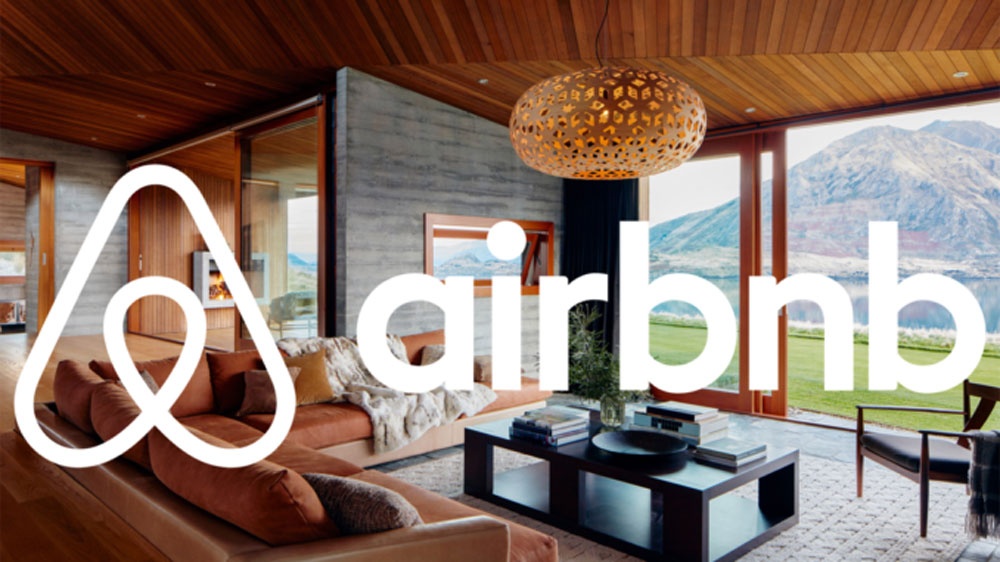

Airbnb is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.The company is based in San Francisco, California, United States.

The company was conceived after its founders put an air mattress in their living room, effectively turning their apartment into a bed and breakfast, in order to offset the high cost of rent in San Francisco; Airbnb is a shortened version of its original name, AirBedandBreakfast.com.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.io import imread

In [ ]:
df_air = pd.read_csv("/content/AB_NYC_2019(1).csv")
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Exploration and variable Identification:

In [ ]:
# checking what are the variables here:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# basic information about the dataset:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Sanity Check:


In [ ]:
# just a simple sanity check:
#look all the property ids are different and each listing are different:

df_air['id'].nunique()

48895

So what are the numerical and categorical variables?

By basic inspection I figured out that a particular property name will have one particular host_name hosted by that same individual but a particular host_name can have multiple properties in a area.

### Categorycal Variable:
So, host_name is a categorical variable here. Also neighbourhood_group,neighbourhood and room_type fall into this category.

### Numeriacal Variable:
While id, latitude, longitude,price,minimum_nights,number_of_reviews,last_review, reviews_per_month calculated_host_listings_count, availability_365 are numerical variables

In [ ]:
# this can be a categorical variable too. lets check as well.

df_air['neighbourhood'].nunique()

221

In [ ]:
df_air['host_name'].nunique()

11452

In [ ]:
df_air['name'].nunique()

47905

In [ ]:
df_air['name'].value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

an intresting observation, looks like few listing have no particular host name as above observation! 

also few listing/property with same names has different hosts in different areas/neighbourhoods of a neighbourhood_group.

In [ ]:
# there are few listing where the property name and the host have same names!
# we can remove duplicates:

df_air[df_air['name'] == df_air['host_name']]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,2018-01-30,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,2015-10-30,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,NaN,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,2018-09-10,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365


In [ ]:
# 'host_id' with most listing counts:

df_air['host_id'].value_counts()[:4]

219517861    327
107434423    232
30283594     121
137358866    103
Name: host_id, dtype: int64

just trying to understand the two variables: name and host_name & its relationship with neighbourhood_group and neighbourhood.(only from the values present inside)

Found out that: A host can have multiple properties in a neighbourhood group with different host-ids but a host with a particular property/listing in a particular neighbourhood of a neighbourhood group have a same host-id(not mandatory as there are exceptions where few hosts have diferrent id's for each listing/property in a neighbourhood)

Also the data so far tells, there might be cases where a particular host has co-hosted someone else's property/listing in a neighbourhood on Airbnb.

these are not that important in our analysis and proceed further!

In [ ]:
# overall summary statistics for all numerical columns:

df_air.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


as we can see in the min. there are some property listed with 0 listed price!

In [ ]:
# checking how many property listed with 0 price?:

len(df_air[df_air['price'] == 0])

11

if a person trying to book a listing for stay/rent he/she will look into these following factors while booking:
name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews
these are the important ones in our analysis. We'll crosscheck though at last!

# Let's do the analysis step by step!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


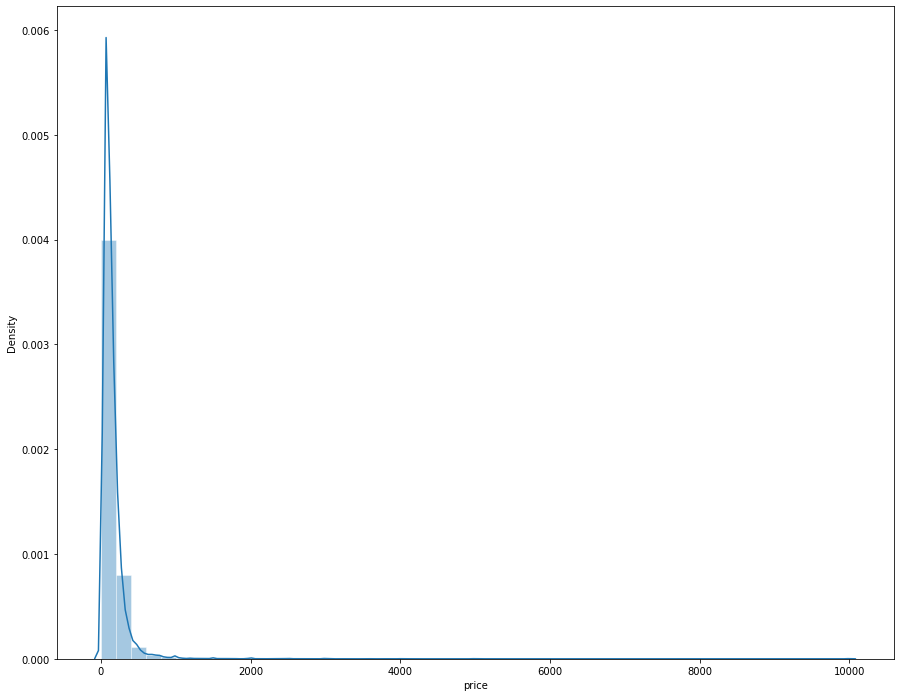

In [ ]:
# distplot:

f,ax = plt.subplots(figsize=(15,12))
sns.set(rc={"figure.figsize": (20,6)})
sns.distplot(df_air['price'], hist=True)


The distribution tells it has positive skew.
Also the distribution doesn't deviate much normal distribution.

In [ ]:
# skewness and kurtosis:

print("Skewness: %f" % df_air['price'].skew())
print("Kurtosis: %f" % df_air['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


Looking at the skew and kurtosis came out very large. Since the skewness has value>1 is highly skewed.

Also, kurtosis looks high as well, which indicates presence of good amount of outliers, we will look into that whenn we handle outliers!!

## Checking the relationship between numerical variable:

<Figure size 1080x864 with 0 Axes>

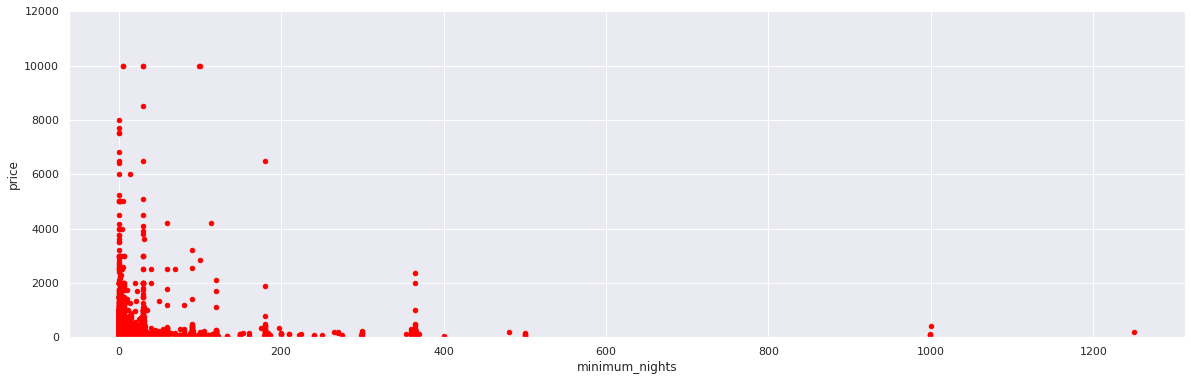

In [ ]:
# price vs. minimum_nights:

var = 'minimum_nights'
plt.figure(figsize=(15,12))
data = pd.concat([df_air['price'], df_air[var]], axis=1)
data.plot.scatter(x=var, y= 'price', c="red", ylim=(0, 12000))

looks many data points are clustured on 0 price range, few have min nights for stay but price is 0. looks like anomaly in price.
there are many outliers as well.

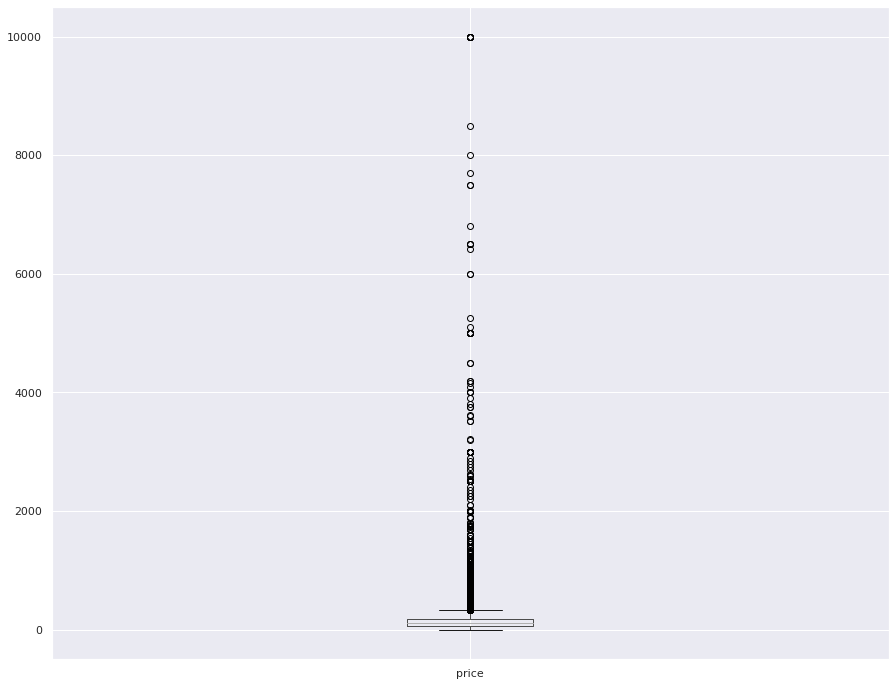

In [ ]:
plt.figure(figsize=(15,12))
df_air.boxplot(column=["price"])
plt.show()

we can see the presence of many oulirrers in price. Definetly we'll remove  those.

In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Let's check correlation matrix to understand how are the features interrelated with each other.

Also to get an idea which are the most important features in this data.

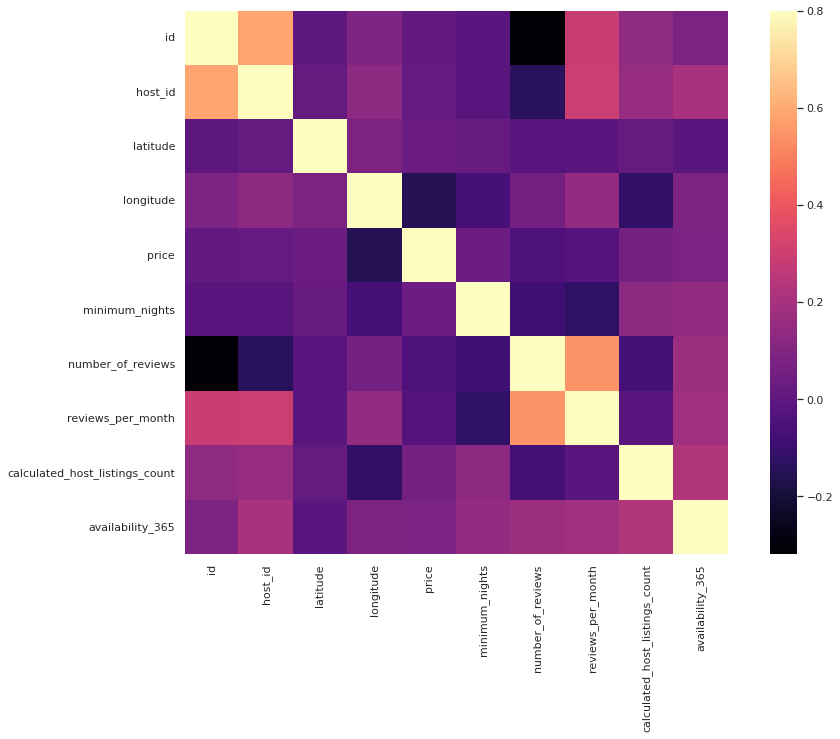

In [ ]:
# correlation metrix:

corrmat = df_air.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax= 0.8,cmap="magma", square=True)  

Clearly from the heatmap we can see the correlation between different features that can affect a airbnb listing.

There's correlation among host_id to reveiws_per_month & availability_365. Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

## Data Pre-processing:

In [ ]:
# checking null values:

df_air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Missing Values:

As, host_name and nbames are not that much important in our analysis, So atleast we are good to fill those with some substitutes in both the columns!

 Since both 'name' and 'host_name' has very less missing values as compare to 47905 listing and 11452 unique hosts!

we can fill these missing values in both with unknown & no_name respectively! 

In [ ]:
df_air['name'].fillna("Unknown", inplace=True)
df_air["host_name"].fillna("no_name", inplace=True)

In [ ]:
# checking if there are any null values or not:

df_air[['host_name', 'name']].isnull().values.any()

False

In [ ]:
no_of_hosts = df_air['host_name'].nunique()
print(f'The no of hosts in NYC: {no_of_hosts}')
no_of_listings = df_air['name'].nunique()
print(f'The total no of listings in NYC: {no_of_listings}')

The no of hosts in NYC: 11453
The total no of listings in NYC: 47906


Also the column: 'last_review' has many null values. And since it's not much required for our analysis as compared to number_of_reviews & reviews_per_month. Welre good to drop these columns. 

In [ ]:
# Dropping "last_review" column:


df_air = df_air.drop(['last_review'], axis=1)

In [ ]:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

### Checking for duplicate data:

In [ ]:
duplicate_data = df_air.duplicated()
print(duplicate_data.sum())
df_air[duplicate_data]

0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


Looks like there is no duplicate data available in our dataset.

'reviews_per_month' column containing null values and we can simple put 0 reviews by replacing NAN's.

In [ ]:
df_air['reviews_per_month'] = df_air['reviews_per_month'].replace(to_replace=np.nan, value=0).astype('int64')

In [ ]:
# checking 'reviews_per_month' columns has null values or not?

df_air['reviews_per_month'].isnull().values.any()

False

Let's check the most no of listing in NYC first!

In [ ]:
# top 5 listing on Airbnb in entire NYC:

listings_count_df = df_air['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listing on Airbnb', 'name': 'Total_listings'}, inplace=True)
listings_count_df

,Listing on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,Unknown,16
3,New york Multi-unit building,16
4,Brooklyn Apartment,12


'Hillside Hotel' is found to have listed more listing in entire NYC, followed by Home away from Home.

In [ ]:
#" top 10 hosts" on the basis of no of listing in entire NYC:

top_10_hosts = df_air['host_name'].value_counts()[:10]

In [ ]:
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in NYC!')

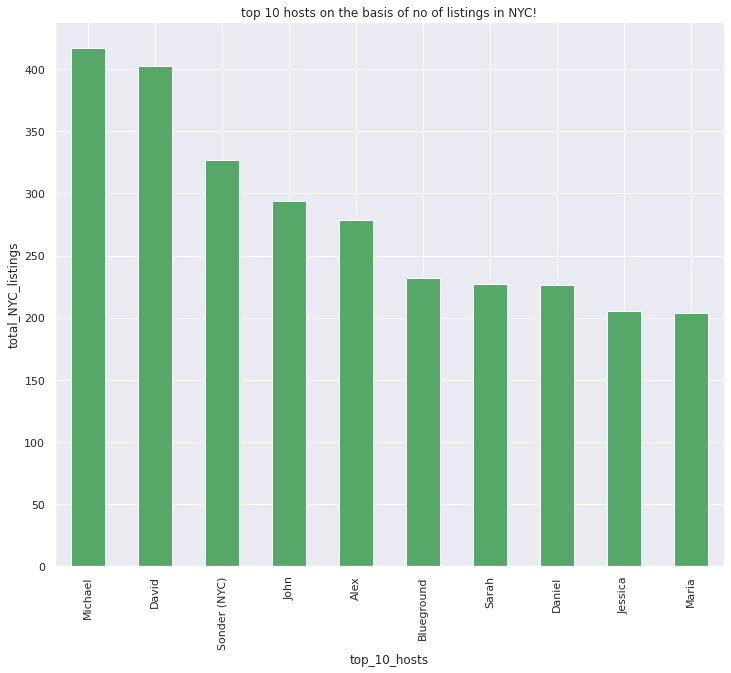

In [ ]:
# making a bar plot for 'tiop_10_hosts':

plt.figure(figsize=(12,10))
top_10_hosts.plot(kind = 'bar', color = 'g')
plt.xlabel('top_10_hosts')
plt.ylabel('total_NYC_listings')
plt.title("top 10 hosts on the basis of no of listings in NYC!")

the host 'Michael' has the top listing property in Airbnb, followed by David and Sonder(NYC)

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhod group')

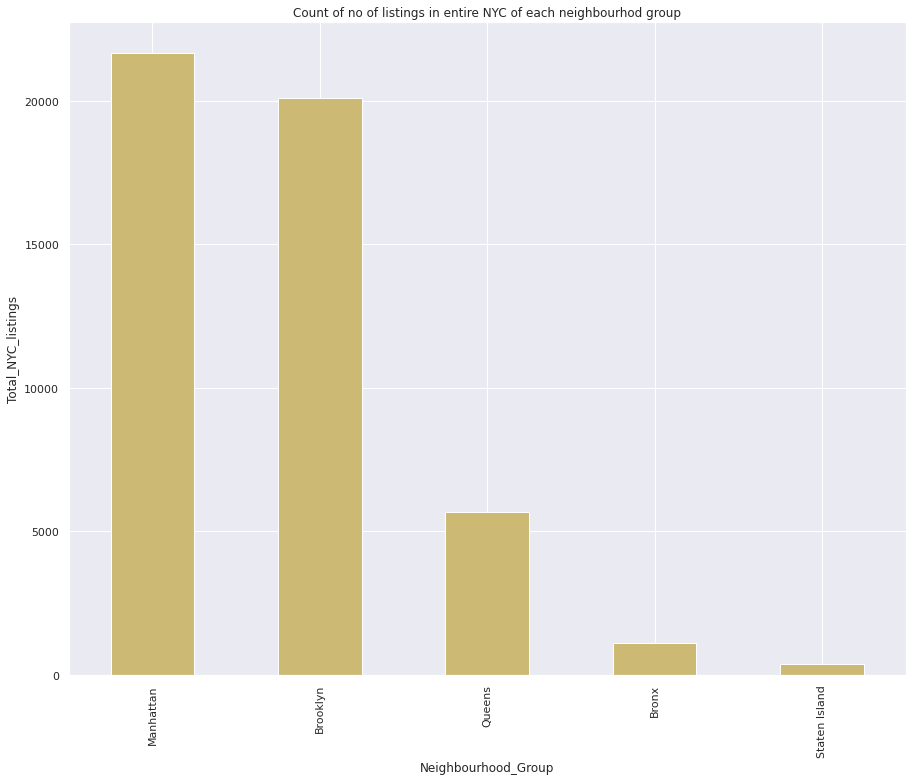

In [ ]:
# let's count which neighbourhood_group has most no of listings in entire NYc:

plt.figure(figsize=(15,12))
df_air['neighbourhood_group'].value_counts().plot(kind='bar', color='y')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('Total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhod group')

As we can see from the plot the neighbourhood_group "Manhattan" has the highest no of listing in entire NYC

In [ ]:
# NOw. looking at the unique neighbourhoods:

df_air['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

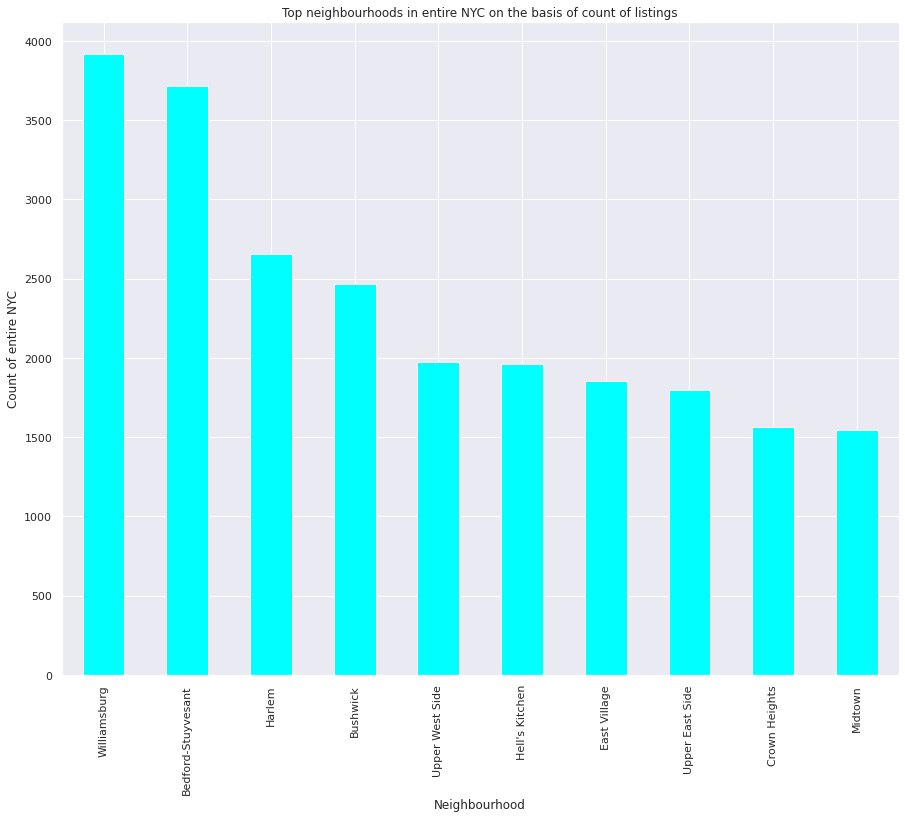

In [ ]:
# So, checking toip 10 "neighbourhoods":

plt.figure(figsize=(15,12))
top_10_neighbours = df_air['neighbourhood'].value_counts()[:10]
top_10_neighbours.plot(kind='bar', color='aqua')
plt.xlabel('Neighbourhood')
plt.ylabel("Count of entire NYC")
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

So, 'Williamsburg' is the Top most neighbourhoods in entire NYC on the basis of count of listings

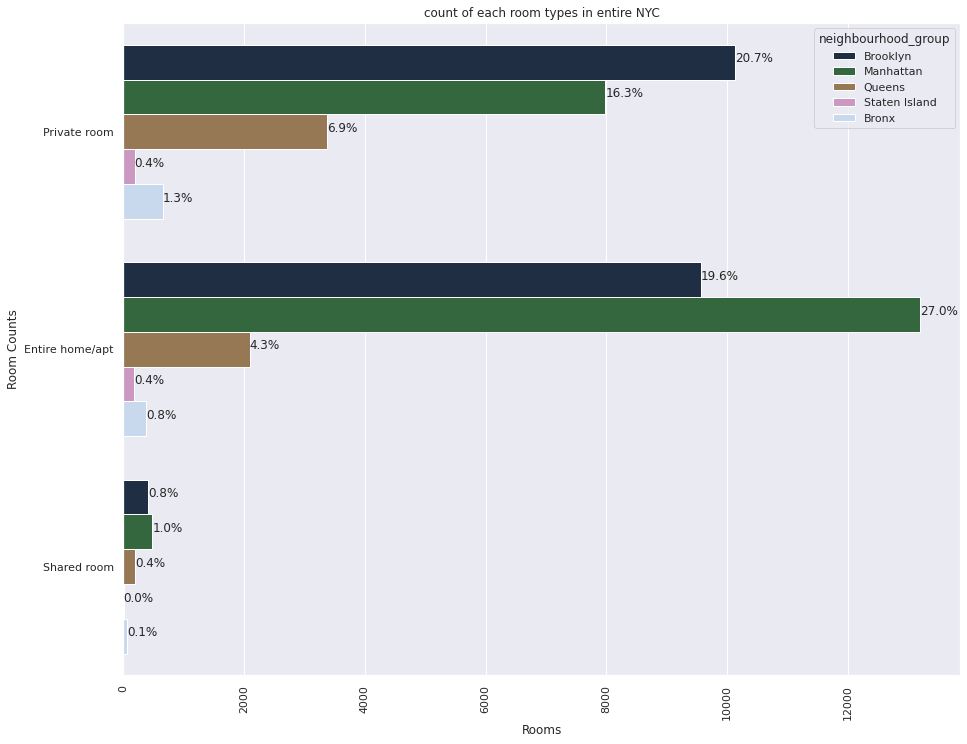

In [ ]:
# now come up with "room_type" along with 'neighbourhood_group':

plt.rcParams['figure.figsize'] = (15,12)
ax = sns.countplot(y='room_type', hue = 'neighbourhood_group', data=df_air, palette = 'cubehelix')

total = len(df_air['room_type'])
for p in ax.patches:
    percentage  = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x,y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel("Room Counts")

plt.show()

Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.

Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.

Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


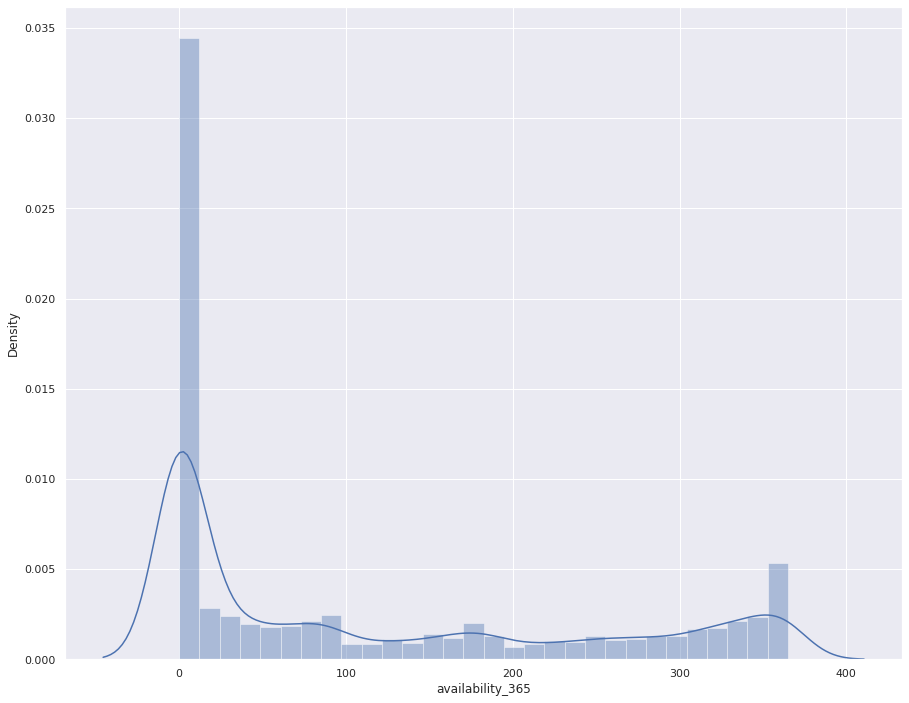

In [ ]:
# let's check distribution of 'availability_365' column:

sns.distplot(df_air['availability_365'])


availability_365 have uniform distribution with availability ranging from 0 to 370

The distribution looks slighly skewed towards right or moderately skewed as per the skewness value ranging between: (0.005-0.010)

Also the distribution looks flatter as compared to a normal distribution, known to be platykurtosis with a negative kurtosis(lack of outliers) as below:

In [ ]:
# skewness and kurtosis:

print("Skewness: %f" % df_air['availability_365'].skew())
print("Kurtosis: %f" % df_air['availability_365'].kurt())

Skewness: 0.763408
Kurtosis: -0.997534


'reviews_per_month' distribution as per listings in NYC:

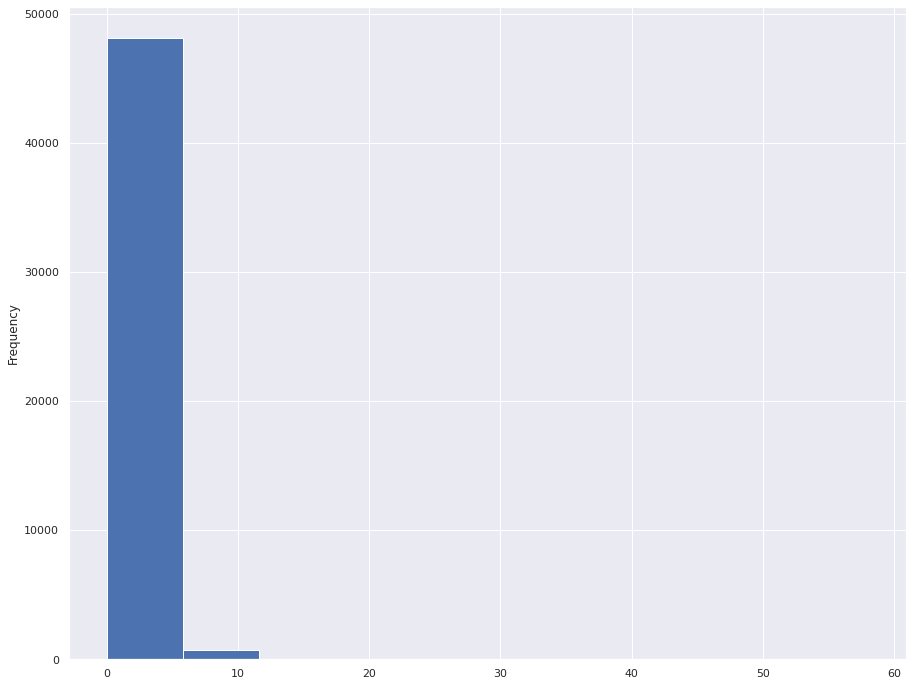

In [ ]:

df_air['reviews_per_month'].plot.hist()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


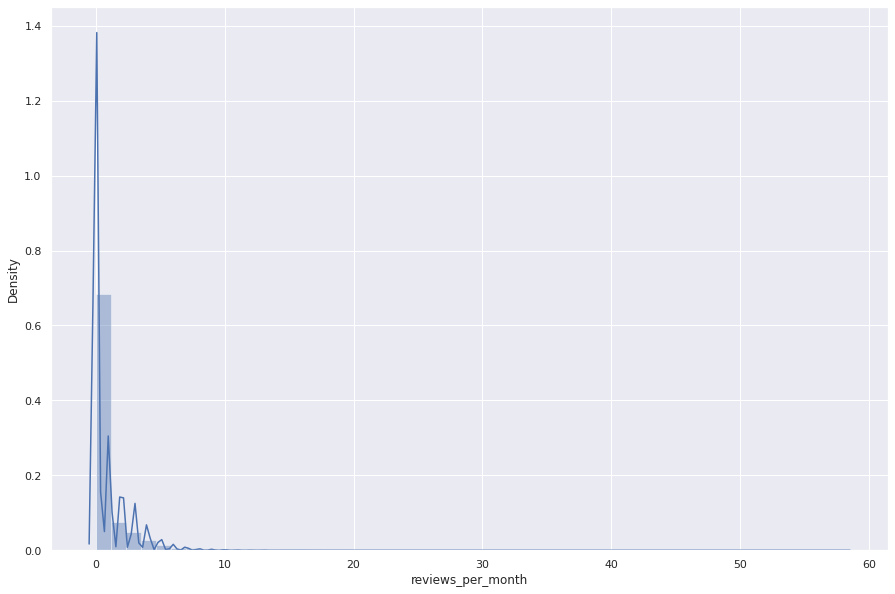

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(df_air['reviews_per_month'])


Looks the reviews_per_month is positively skewed(high) towards right with longer tails indicating the presence of outliers.

Moreover, from the two distribution we can infer that monthly reviews goes from 0-10 and it ranges till 60 at highest.

In [ ]:
# skewness and kurtosis:

print("Skewness: %f" % df_air['reviews_per_month'].skew())
print("Kurtosis: %f" % df_air['reviews_per_month'].kurt())

Skewness: 3.751642
Kurtosis: 54.337612


Insights:
    both, skewness and kurtosis are much high, indicates presence of large aount of outliers.

### Handling the outliers:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


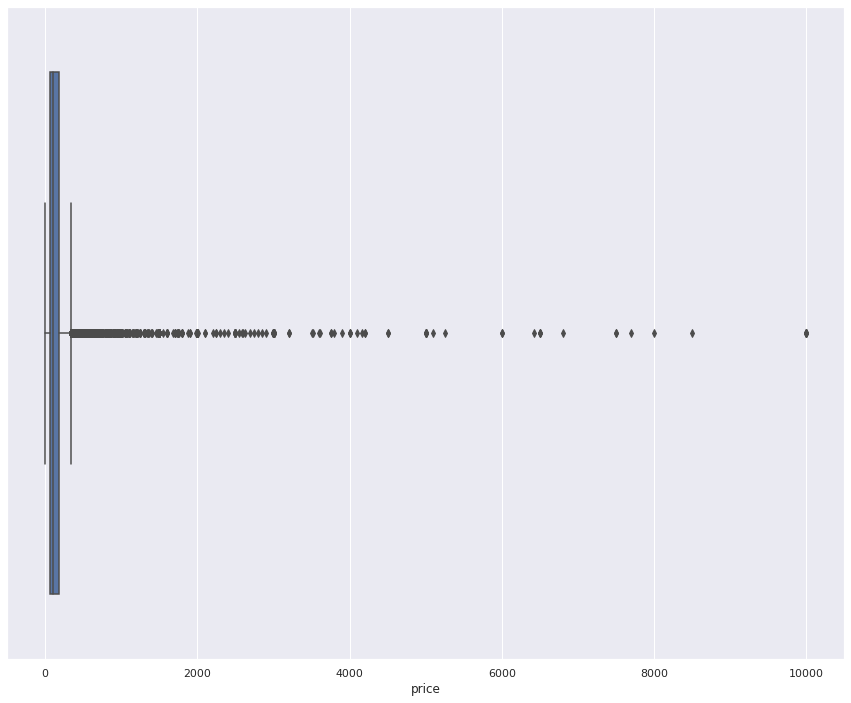

In [ ]:
# checking 'price' outliers:

sns.boxplot(df_air['price'])

In [ ]:
df_air.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


Using quammtile approch to remove outliers.

In [ ]:
min_threshold, max_threshold = df_air.price.quantile([0.01, 0.999])
min_threshold, max_threshold

(30.0, 3000.0)

In [ ]:
# prices less than min. threshold!

df_air[df_air.price < min_threshold]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,0,1,226
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,0,1,321
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,0,4,137
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,5,3,50
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,1,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,1,1,322
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,0,1,24
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,0,3,363
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,0,6,338


In [ ]:
# similary for getting extreme price value max_threshold
df_air[df_air.price > max_threshold]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,0,1,83
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,0,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,0,1,359
3695,2224896,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,0,1,0
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,0,1,0
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,0,1,0
3788,2281142,Prime NYC Location for Super Bowl,1427243,Jordana,Manhattan,East Village,40.73323,-73.98859,Entire home/apt,3750,1,0,0,1,0
4345,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,0,1,363
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,0,11,365
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0,11,365


In [ ]:
df_air_pnw = df_air[(df_air.price > min_threshold) & (df_air.price < max_threshold)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


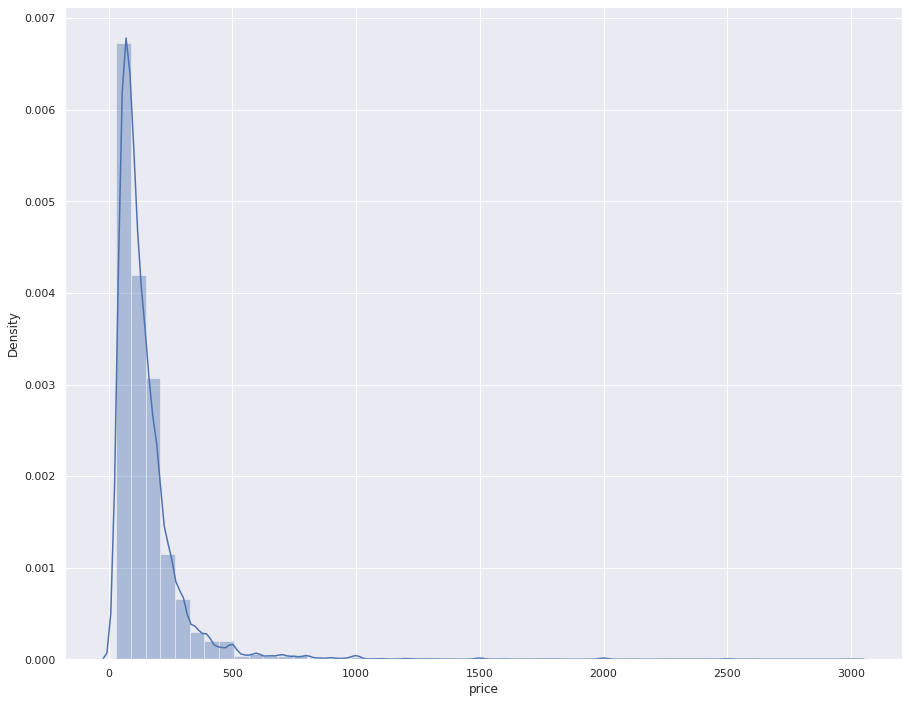

In [ ]:
sns.distplot(df_air_pnw['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


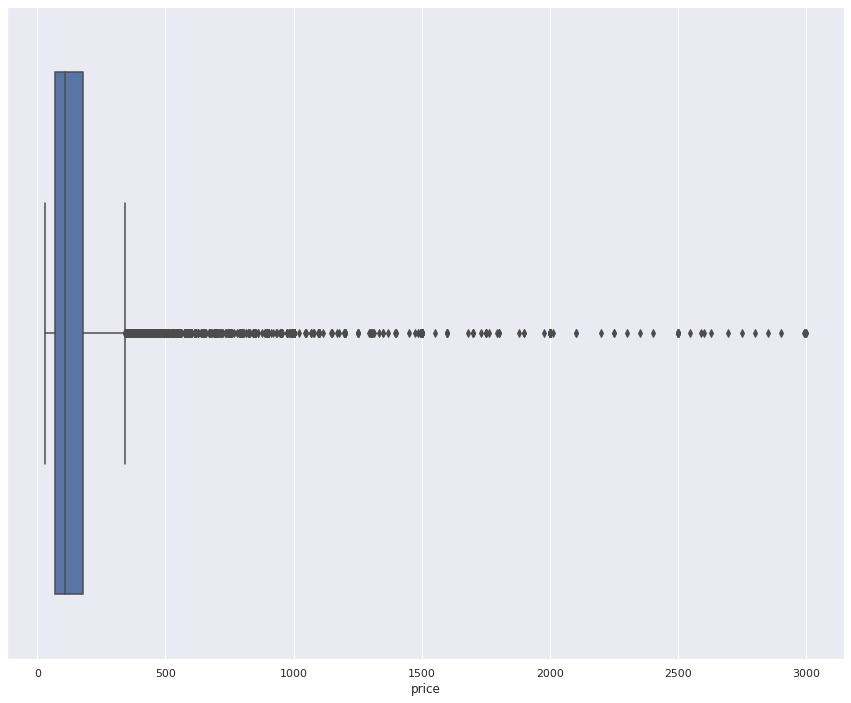

In [ ]:
# checking outliers in boxplot again:

sns.boxplot(df_air_pnw['price'])

looks like are still many outliers!

In [ ]:
# skewness and kurtosis:

print('Skweness: %f' % df_air_pnw['price'].skew())
print('Kurtosis: %f' % df_air_pnw['price'].kurt())

Skweness: 6.378314
Kurtosis: 70.394436


### Removing Outliers using IQR approch!

(has performed best in removing outliers)

In [ ]:
# Trying removing outliers using IQR!

Q1 = df_air.quantile(0.25)
Q3 = df_air.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.000000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


In [ ]:
# writitng a outlier function for removing outliers!

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)

    return lower_range, upper_range

In [ ]:
lower_bound, upper_bound = outlier_treatment(df_air['price'])

In [ ]:
# Looking at the low & upper range outliers:

df_air[(df_air.price < lower_bound) | (df_air.price > upper_bound)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,0,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,0,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,0,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,0,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,0,1,9


In [ ]:
# subsetting only those rows having datapoints greater than lower range and lesser than upper range respectively

df_air_pnw1 = df_air[(df_air.price > lower_bound) & (df_air.price < upper_bound)]

In [ ]:
df_air_pnw1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2


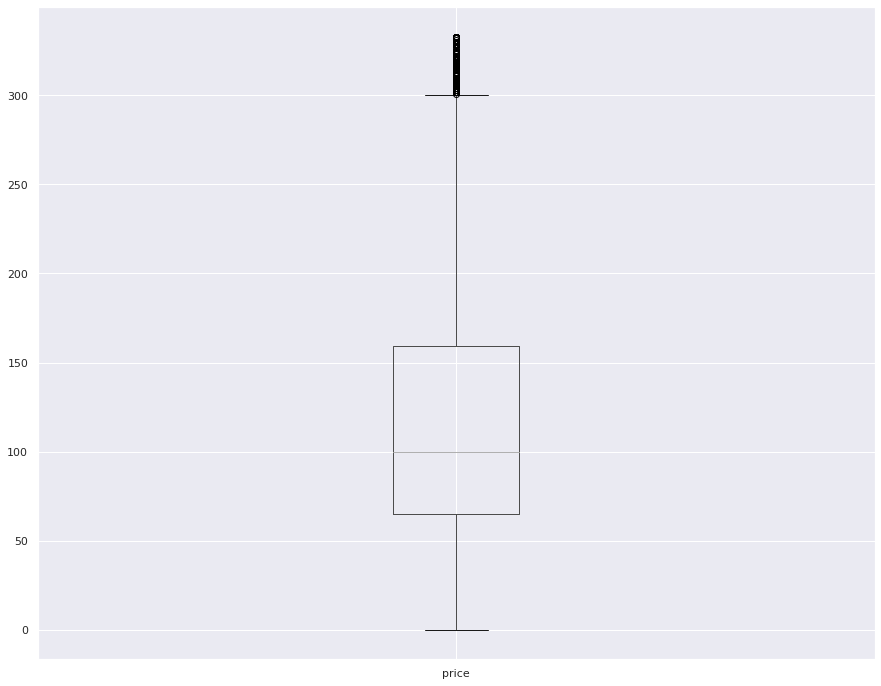

In [ ]:
# the boxplot for price now looks good without outliers!
df_air_pnw1.boxplot(column = 'price')

In [ ]:
# skewnes and kurtosis:

print("Skewness: %f" % df_air_pnw1['price'].skew())
print("Kurtosis: %f" % df_air_pnw1['price'].kurt())

Skewness: 0.922925
Kurtosis: 0.169543


Checking for the distribution of this new prices as well.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


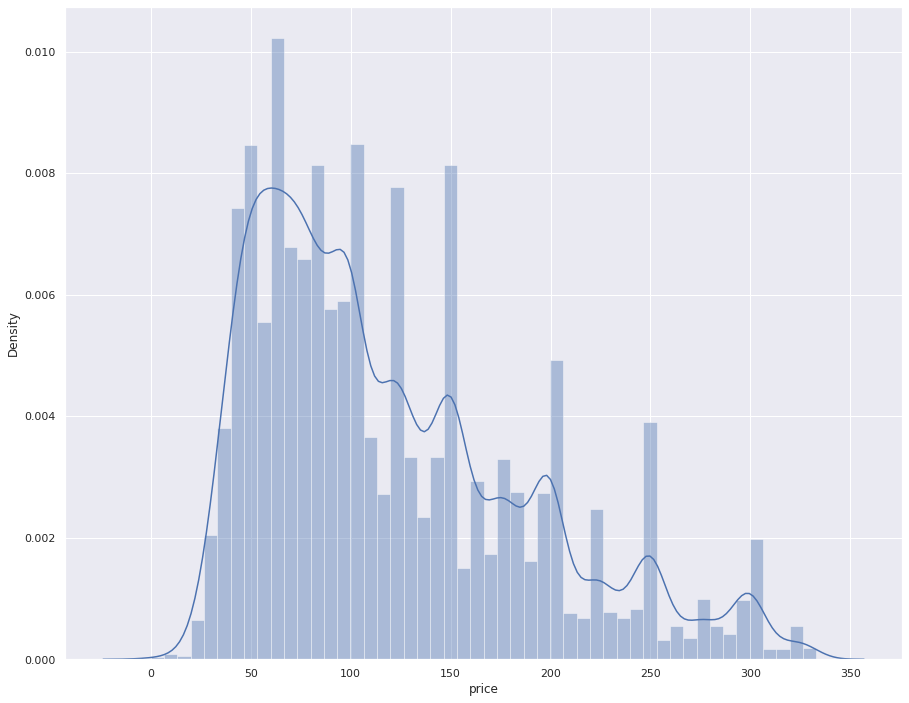

In [ ]:
sns.distplot(df_air_pnw1['price'])

### Bi-variate Analysis!

Now let's understand the distribution of price(without extreme values) along neighbourhood groups.

In [ ]:
df_air_pnw1['neighbourhood_group'].value_counts()

Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

### Distribution of price across Manhattan, Brooklyn, Queens, Bronx & Staten Island:

Instead of checking distributions for each categories one by one we can simply do a violin plot for getting the overall statistics for each groups. But we'll get to know the median of price/neighbourhood group.

We can do a seaborn point plot to get the average prices/neighbourhood in NYC!

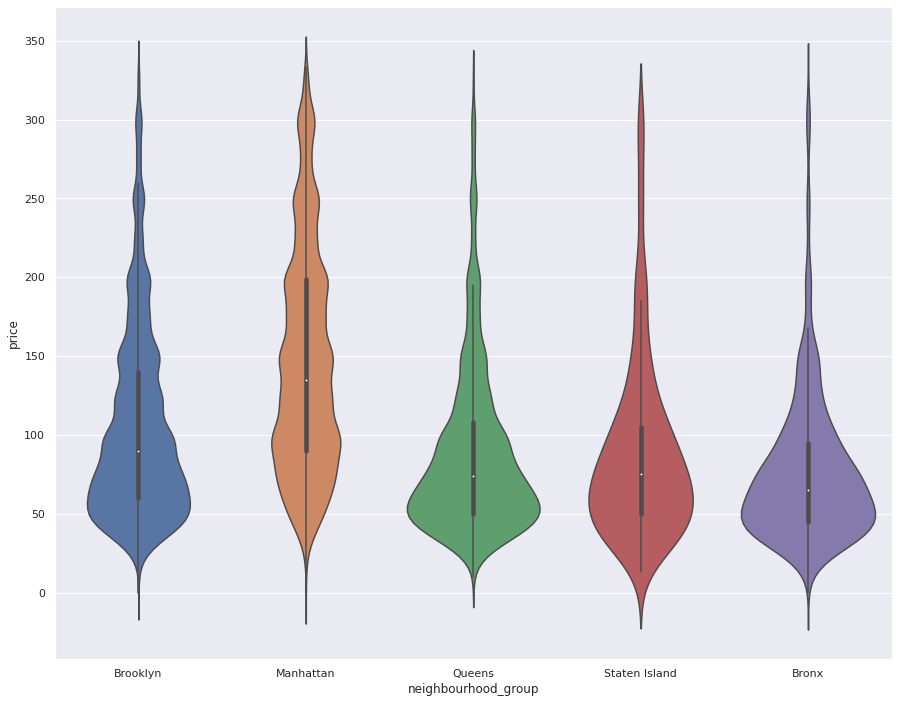

In [ ]:
ax = sns.violinplot(x='neighbourhood_group', y='price', data=df_air_pnw1)

As usual Manhattan being the most costliest place to live in, have price more than 140 USD followed by Brooklyn with around 80 USD on an average for the listings.

Queens, Staten Island are on the same page with price on listings.

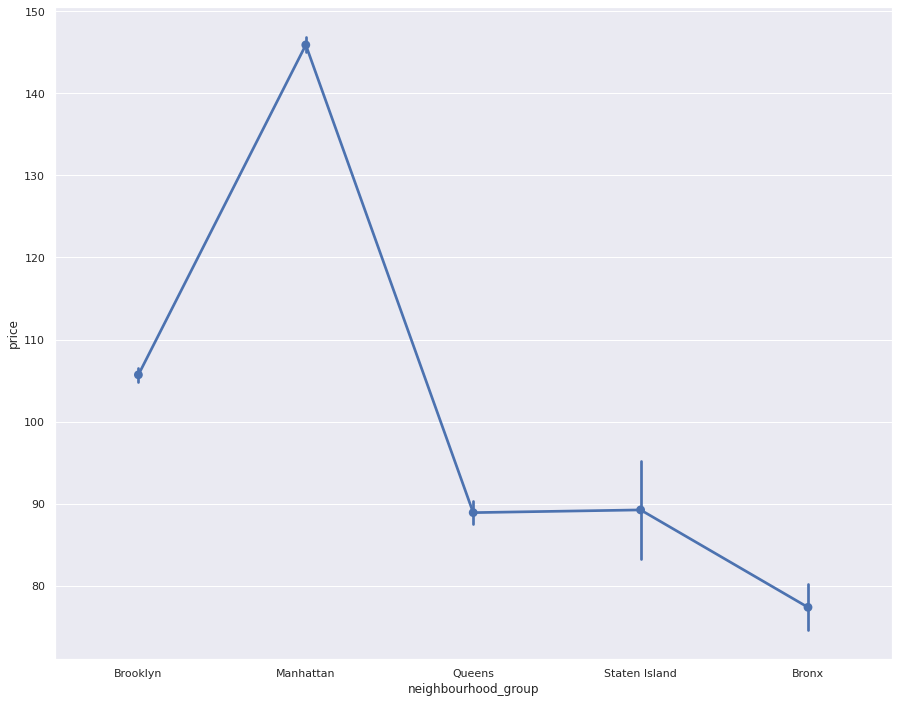

In [ ]:
# looking for the average price each neighbourhood groups holds in a seaborn pointplot:

sns.pointplot(x='neighbourhood_group', y='price', data=df_air_pnw1)

We can see that **Manhattan** has the highest(the costliest) average of price ranging to ~150dollars/day followed by **Brooklyn**
**Queens** and **Staten Island** have same average price/day, while Bronx comes out to be the cheapest neighbourhood group in NYC.

Well, let's deep dive into cost of living as it is the most important factor for someone willing to rent/stay using Airbnb.

### Now, let's check the expensive & cheapest listing with respect to prices leading in entire NYC!

### The costliest?

In [ ]:
df_air_pnw.nlargest(5,'price')[['name', 'neighbourhood_group','neighbourhood', 'host_name', 'room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Upper West Side,Lisa,Entire home/apt
48304,Next to Times Square/Javits/MSG! Amazing 1BR!,Manhattan,Hell's Kitchen,Rogelio,Entire home/apt
46533,Amazing Chelsea 4BR Loft!,Manhattan,Chelsea,Viberlyn,Entire home/apt
30824,Designer's Beautiful 2BR Apartment in NOLITA/SOHO,Manhattan,Nolita,Ilo And Richard,Entire home/apt
22992,"Modern Townhouse for Photo, Film & Daytime Ev...",Manhattan,Upper West Side,Lanie,Entire home/apt


Looks like all the top 5 costliest listings belongs to **Manhattan** along with entire home/apt itself(being the most costliest place of living in NYC)

### The Cheapest?

In [ ]:
df_air_pnw.sort_values(by = 'price', ascending=True)[['name', 'neighbourhood', 'neighbourhood_group','host_name', 'room_type']] [:5]

,name,neighbourhood,neighbourhood_group,host_name,room_type
12516,cute and cozy room in brooklyn,Bedford-Stuyvesant,Brooklyn,Ornella,Private room
7864,Comfortable and Large Room,Flatbush,Brooklyn,Kay,Private room
29967,Large bed room share bathroom,Elmhurst,Queens,Cha,Private room
39100,15 minutes From Times Square!!,Washington Heights,Manhattan,Ari,Private room
28700,Cozy room in Loft Apartment - Brooklyn,Ridgewood,Queens,Estefani,Private room


 the cheapest listings mostly comes from Brooklyn, Queens and all are private rooms which makes sense.

## Top neighbourhoods in NYC with respect to average price/day of Airbnb listings:

let's check for the neighbourhoods with listings having highest average price/day in each neighbourhood groups of NYC!

In [ ]:
df_ngrp = df_air_pnw.groupby(['neighbourhood_group', 'neighbourhood']) ['price'].mean().reset_index()

In [ ]:
top_neight_each = df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price', ascending=False)
top_neight_each

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
121,Manhattan,Tribeca,410.531429
163,Queens,Neponsit,274.666667


Among the top neighbourhoods in each neighbourhood groups, top 2 of them namely: **Fort Wadsworth** & **Sea Gate**, origins from **Staten Island** & **Brooklyn**.

**Riverdale** from **Bronx **and **Tribeca** from** Manhattan**. **Neponsit** from Queens.

Text(0, 0.5, 'price')

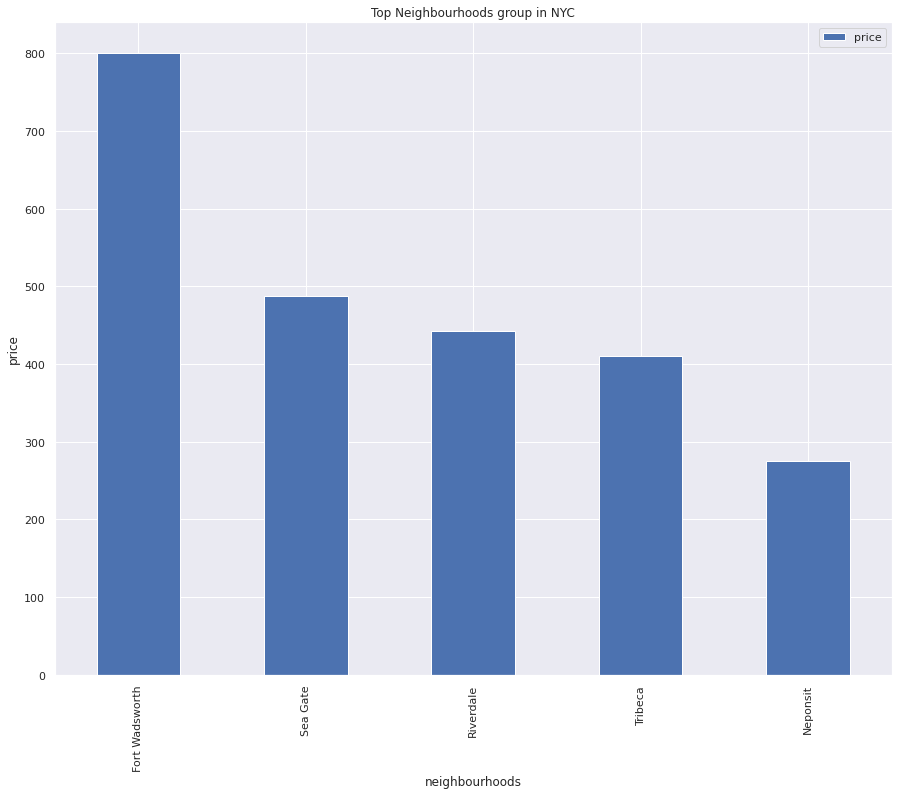

In [ ]:
top_neight_each.plot.bar(x='neighbourhood', rot=90, title='Top Neighbourhoods group in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

#### Let's checkout the costliest listings in each neighbourhood groups & their respective hosts:¶

In [ ]:
# costliest listings in each neighbourhood groups:

costliest_df = df_air_pnw.loc[df_air_pnw.groupby(['neighbourhood_group'])['price'].idxmax()] [['name', 'neighbourhood_group', 'host_name', 'price']]

In [ ]:
costliest_df.sort_values(by='price', ascending = False)

,name,neighbourhood_group,host_name,price
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Lisa,2999
29665,Park Place Townhouse by (Hidden by Airbnb),Brooklyn,Sally,2626
42680,Majestic Mansion LifeStyle :),Queens,Shah,2600
24477,"""The luxury of Comfort""",Bronx,Kathy,2500
45572,Central Hall Colonial with Free Parking Bus EX...,Staten Island,Anastasios,1250


Looks like the top 2 costliest listings: LUXURIOUS 5 bedroom, 4.5 bath home & Park Place Townhouse were from **Manhattan** and **Brooklyn**, hosted by** Lisa** and **Sally** respectively.



Also, the **cheapest listings** in each neighbourhood groups & their respective hosts:

In [ ]:
# cheapest_listing:

cheapest_df = df_air_pnw.loc[df_air_pnw.groupby('neighbourhood_group')['price'].idxmin()]  [['neighbourhood_group', 'name', 'host_name', 'price']]


In [ ]:
cheapest_df.sort_values(by='price', ascending=True)

,neighbourhood_group,name,host_name,price
2887,Brooklyn,Amazing Spacious Room,Lord Daniel,31
7431,Manhattan,Cozy room right on BROADWAY - Washington Heights,Nga,31
6615,Queens,"Super Clean, Quiet & Spacious Room",Troy,31
30312,Staten Island,Nice room near SI Ferry \n15 minutes by car.,Sara I,31
3889,Bronx,"A Simple, Calm Space",Août,32


Looks almost all the neighbourhood groups with the lowest price falls in the same price range for the cheapest listings.

## 'Room_types' vs 'price' on different neighbourhood Group:

In [ ]:
# unique rooms available throughout NYC:

df_air_pnw['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

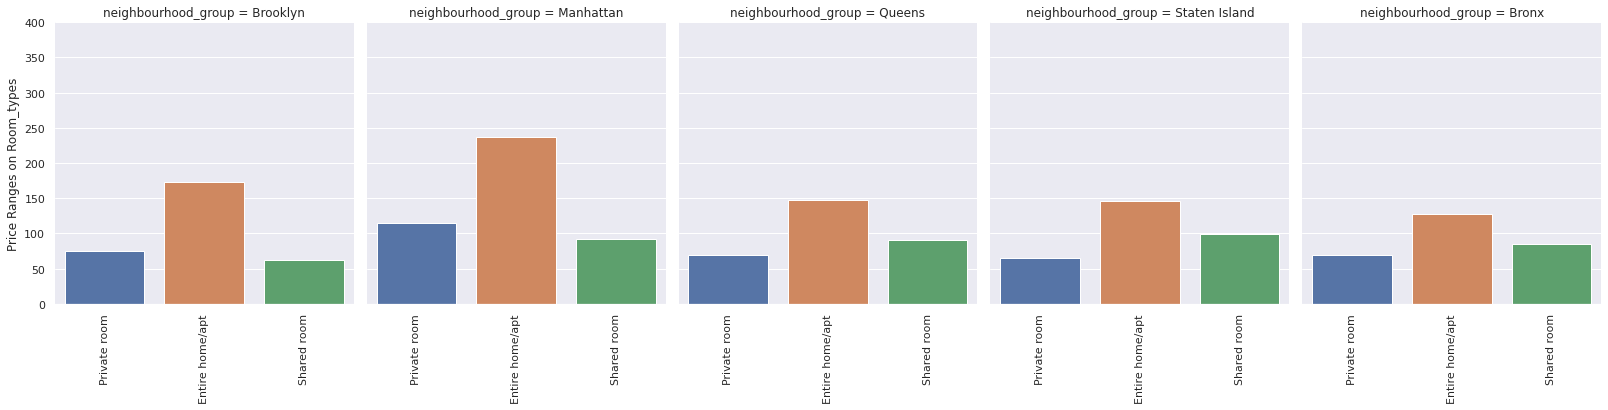

In [ ]:
# Room_type vs price:

g = sns.catplot(x='room_type', y='price', col = 'neighbourhood_group',
                data=df_air_pnw, saturation=.8,
                kind='bar', ci=None, aspect=0.9)
(g.set_axis_labels("", "Price Ranges on Room_types")
.set_xticklabels(['Private room', 'Entire home/apt', 'Shared room'], rotation=90)
.set(ylim=(0,400))
.despine(left=True))

Looks like a property/listing with Entire home/apt as room_type wins the show at NYC followed by private rooms.

Manhattan has the highest price for room types with Entire home/apt ranging to nearly 240 USD/night, followed by Private room with 110 USD/night. And it's obvious being the most expensive place to live in!

### On an average for how many nights people stayed in each room_types!

Text(0, 0.5, 'Min Stays')

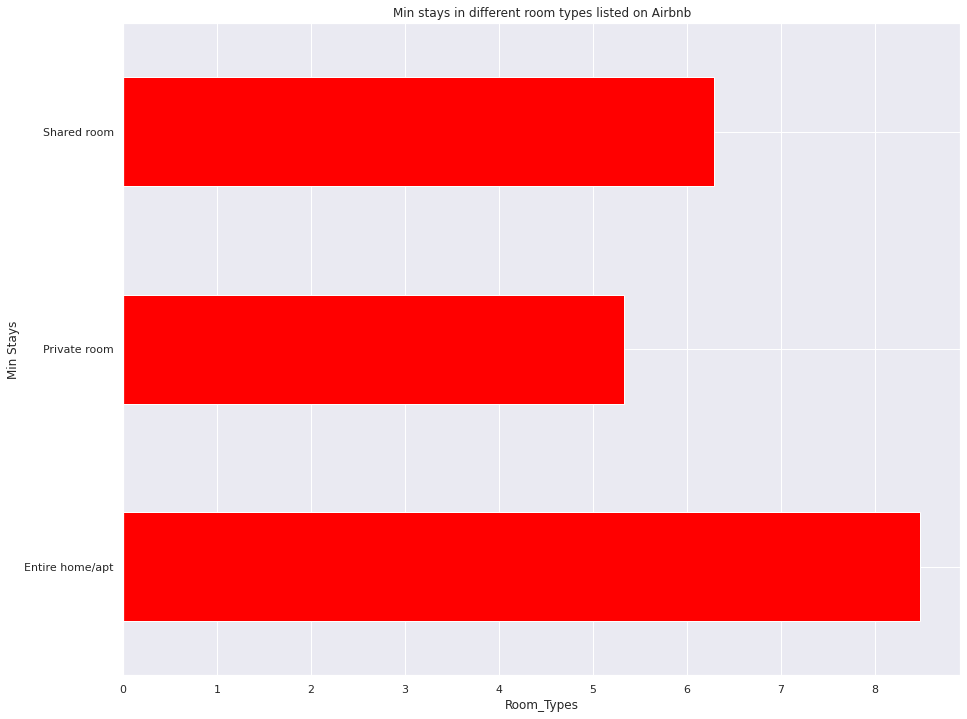

In [ ]:
# min. night:

df_air_pnw.groupby('room_type')['minimum_nights'].mean().plot(kind='barh', color='red')
plt.title("Min stays in different room types listed on Airbnb")
plt.xlabel("Room_Types")
plt.ylabel("Min Stays")

Looking at these it clearly indicates that people mostly prefer living in an **entire home/apt** on an average of **more than 8 nights** followed by guests who stayed in **shared room** where average stay is 6-7 nights.

### Let's play around with the reviews on listings in NYC!

### ***Top 10 most reviewed listing in NYC***

In [ ]:
top10_reviewed_listings = df_air.nlargest(10, 'reviews_per_month')
top10_reviewed_listings[['name', 'reviews_per_month', 'neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58,Manhattan
42076,Great Room in the heart of Times Square!,27,Manhattan
38870,Lou's Palace-So much for so little,20,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16,Queens
36238,“For Heaven Cakes”,15,Queens
40036,6 Minutes From JFK Airport Cozy Bedroom,15,Queens


So, this are the listings with highest number of reviews, the highest being: **Enjoy great views of the City in our Deluxe Room!** with 58 reviews/month followed by **Great Room in the heart of Times Square!** with a total of 27 reviews/month. Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford.  

**Also, Lets look how monthly reviews varies with room types in each neighbourhood groups!**

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

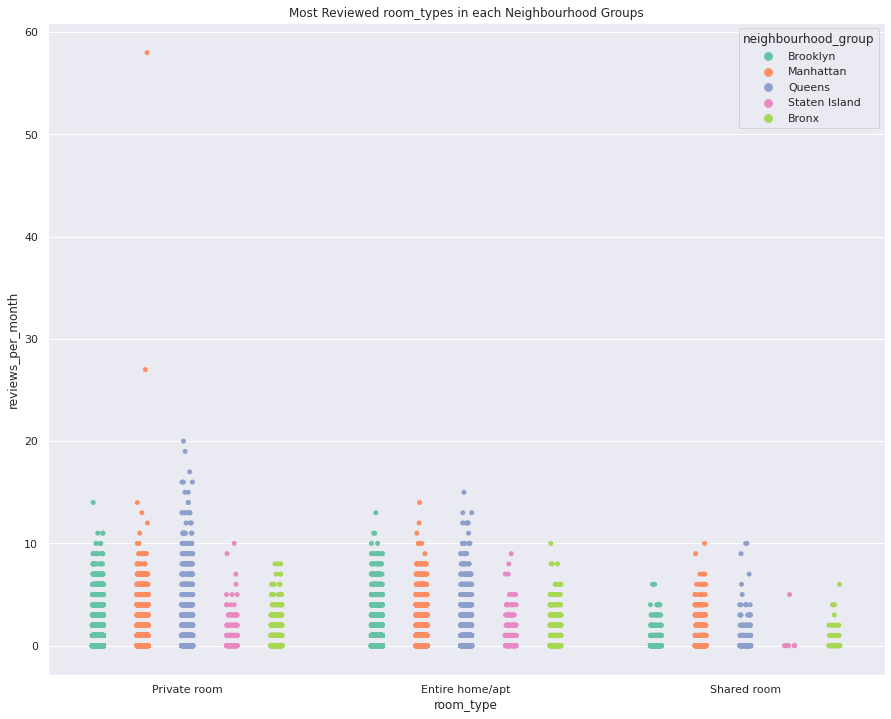

In [ ]:
f, ax = plt.subplots(figsize=(15,12))
ax = sns.stripplot(x='room_type', y='reviews_per_month', hue='neighbourhood_group', dodge=True, data=df_air, palette='Set2')
ax.set_title("Most Reviewed room_types in each Neighbourhood Groups")

We can see that **Private room** recieved the most no of reviews/month where **Manhattan** had the highest reviews received for Private rooms with more than 50 reviews/month, followed by **Manhattan** in the chase. <br>

Manhattan & Queens got the most no of reviews for Entire home/apt room type. <br>

There were less reviews recieved from **shared rooms** as compared to other room types and it was from **Staten Island** followed by **Bronx**.

**### Let's find the top 10 reviewed hosts on the basis of reviews/month.**

Text(0.5, 1.0, 'Top 10 reviews/month received by hosts')

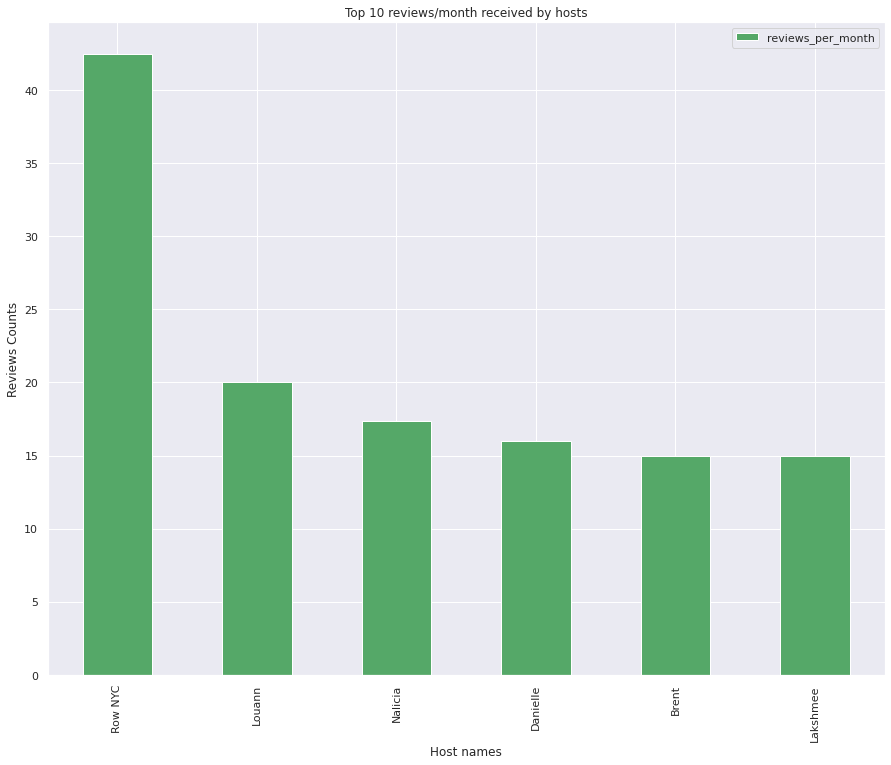

In [ ]:
# there are cases where same hosts are hosting multiple properties in same/different areas.

reviews_df = top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean()
reviews_df = reviews_df.reset_index().sort_values(by='reviews_per_month', ascending= False)
reviews_df.plot(x='host_name', y='reviews_per_month', kind='bar', color='g')
plt.xlabel("Host names")
plt.ylabel("Reviews Counts")
plt.title("Top 10 reviews/month received by hosts")

Row NYC holds the title as the most reviewed host with more than 40 reviews/month on average.

### Hosts with most no of listings in NYC(on the basis of host listings count):

In [ ]:
host_with_most_listings = df_air.groupby(['host_name', 'neighbourhood_group']) ['calculated_host_listings_count'].sum().reset_index()
largest_listings_df = host_with_most_listings.nlargest(10, 'calculated_host_listings_count')
largest_listings_df

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
1834,Blueground,Manhattan,53360
7275,Kara,Manhattan,14669
6540,Jeremy & Laura,Manhattan,9216
13216,Sonder,Manhattan,9216
2901,Corporate Housing,Manhattan,8281
7480,Kazuya,Queens,8137
7546,Ken,Manhattan,7500
11399,Pranjal,Manhattan,4225
9856,Mike,Manhattan,2824


So, **Sonder(NYC)** leads the most expensive neighbourhood group in NYC with around 106929 properties listed followed by Blueground and Kara. <br>

Also, all 3 of them has their listings on Manhattan.


### **hosts with most listings in each neighbourhood group**.<br>

The hosts leading each neighbourhood group with most no of Airbnb listings in entire NYC.

In [ ]:
hosts_df = host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
host_with_most_listings[hosts_df].sort_values(by = 'calculated_host_listings_count', ascending=False)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
7480,Kazuya,Queens,8137
14432,Vida,Brooklyn,2705
14435,Vie,Bronx,169
685,Amarjit S,Staten Island,64


So, **Sonder (NYC)**, Kazuya, Vida, Vie and Amarjit are the hosts with most no of listings in each neighbourhood groups in entire NYC!

## Room_types and their relation with availability in different neighbourhood groups!

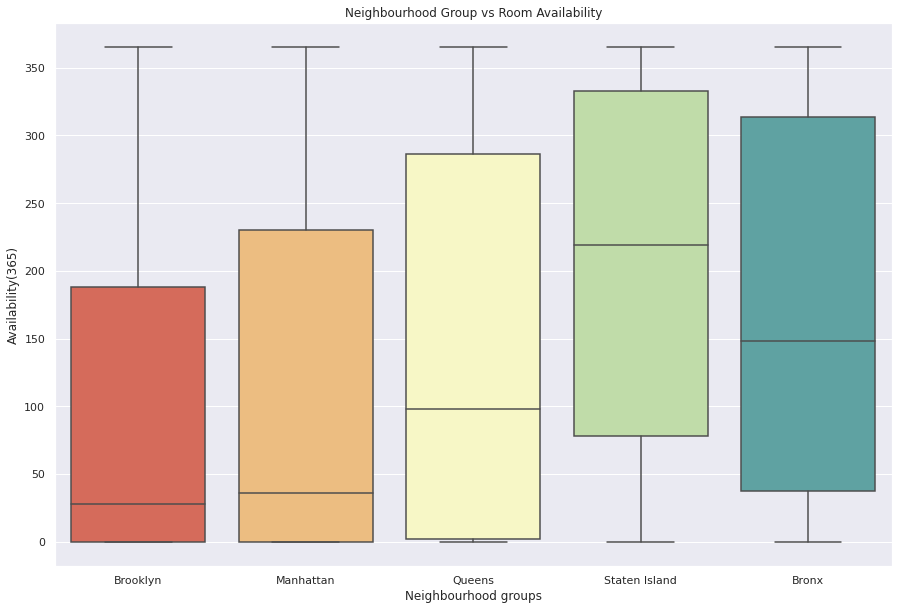

In [ ]:
from IPython.core.pylabtools import figsize
f, ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(x='neighbourhood_group', y='availability_365', data=df_air, palette="Spectral")
plt.title("Neighbourhood Group vs Room Availability")
plt.xlabel("Neighbourhood groups")
plt.ylabel("Availability(365)")
plt.show()

Looking at the above categorical box plot we can infer that the listings in **Staten Island** seems to be more available throughout the year to more than 300 days. On an average, these listings are available to around 210 days every year followed by **Bronx** where every listings are available for 150 on an average every year.

## Latitude & Longitude!

Text(0.5, 1.0, 'Location Co-ordinates')

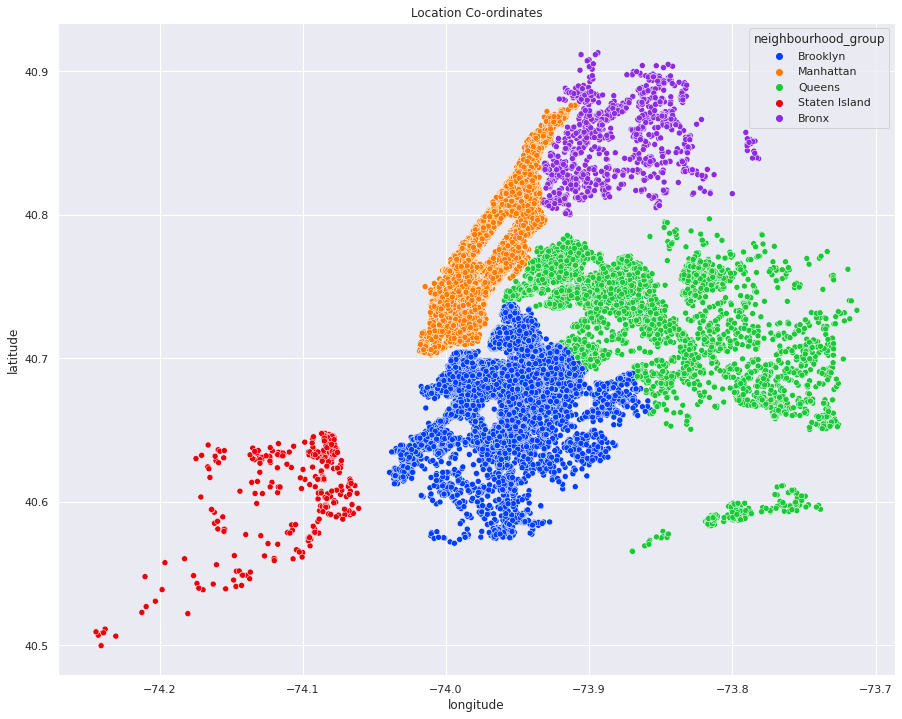

In [ ]:
# trying to find where the coordinates belong from the latitude and longitude

sns.set(rc={'figure.figsize': (15,12)})
ax = sns.scatterplot(data=df_air_pnw, x='longitude', y='latitude', hue='neighbourhood_group', palette="bright")
ax.set_title("Location Co-ordinates")

**Let's observe the type of rooms as well**

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

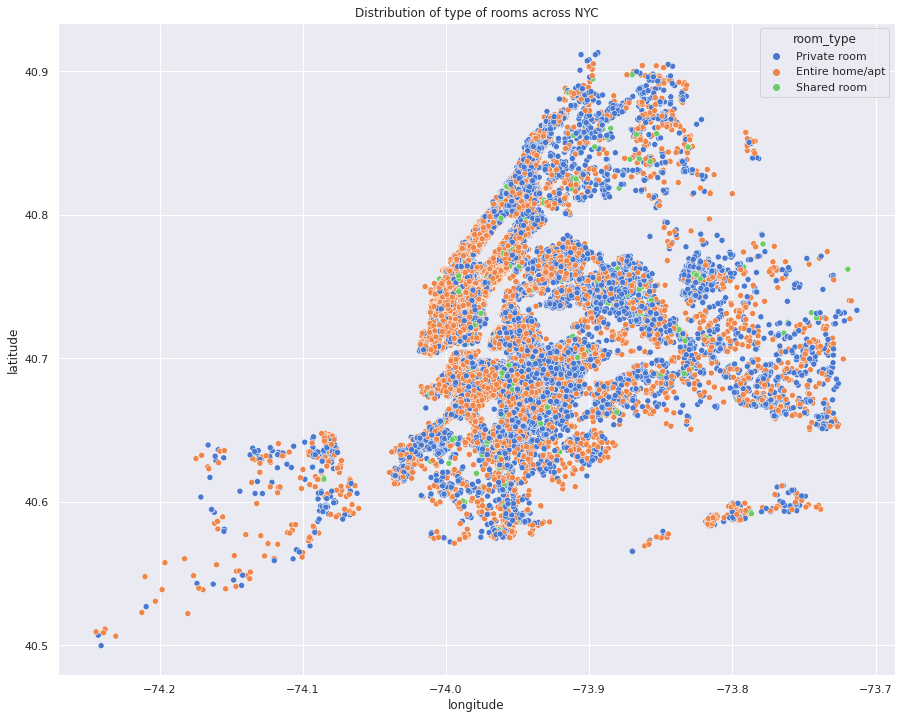

In [ ]:
sns.set(rc={'figure.figsize': (15,12)})
ax = sns.scatterplot(x=df_air_pnw.longitude, y=df_air_pnw.latitude, hue = df_air.room_type, palette="muted")
ax.set_title('Distribution of type of rooms across NYC')

By the two scatterplots of latitude vs longitude we can infer there's is very less shared room throughout NYC as compared to private and Entire home/apt. <br>

95% of the listings on Airbnb are either **Private room** or **Entire/home apt**. Very few guests had opted for shared rooms on Airbnb. <br>

Also, guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis.

We can infer that there are high range of prices across **Manhattan** being the most costliest place to stay in NYC

### **Let's look at the listings availabilities in a year throughout NYC**

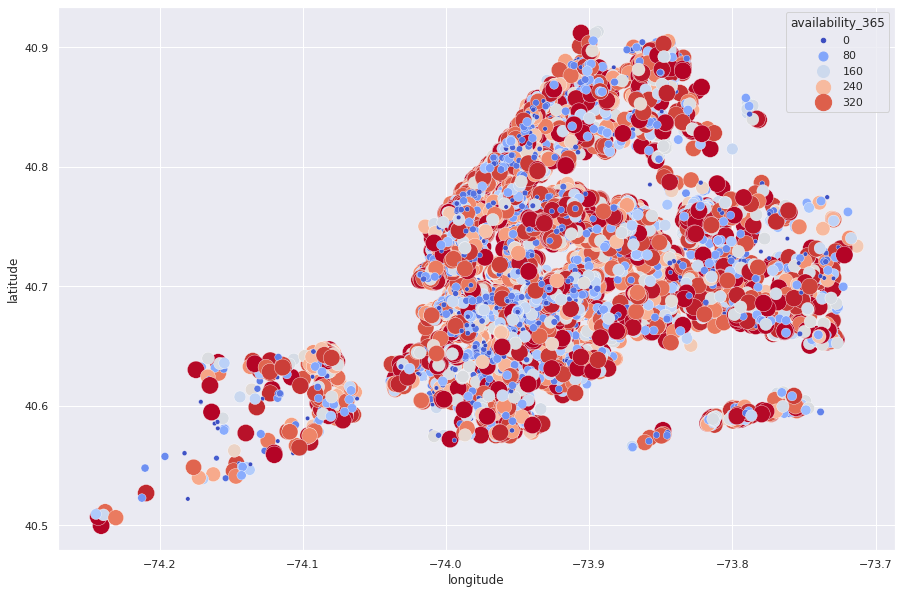

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
ax = sns.scatterplot(data = df_air_pnw1, x='longitude', y='latitude', hue='availability_365', palette = 'coolwarm', 
                     size = 'availability_365', sizes = (20,300))

Also, looks **Bronx** & **Staten Island** has listings which are mostly available throughout the year, might be the case as they are not much costlier as compared to other boroughs as in Manhanttan, Brooklyn & Queens.

## Overview:
 We philosophied about the variables, we analysed 'price' and also checked with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier.
